In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['grid','notebook'])

In [2]:
df= pd.read_excel('GS98.xlsx')

In [ ]:
#df.head(10)

In [4]:
# opening all the columns of the data set
df.columns

Index(['Mass', 'Radius', 'Temp', 'Rho', 'Pres', 'Lumi', 'H1', 'He4', 'He3',
       'C12', 'C13', 'N14', 'N15', 'O16', 'O17', 'O18', 'Ne', 'Na', 'Mg', 'Al',
       'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn',
       'Fe', 'Co', 'Ni'],
      dtype='object')

In [5]:
#storing all the pressure values in an array
df['Pres']=df.Pres.astype(float)

In [81]:
c_s =np.array(np.sqrt((1.66*df.Pres)/df.Rho))*10**-5

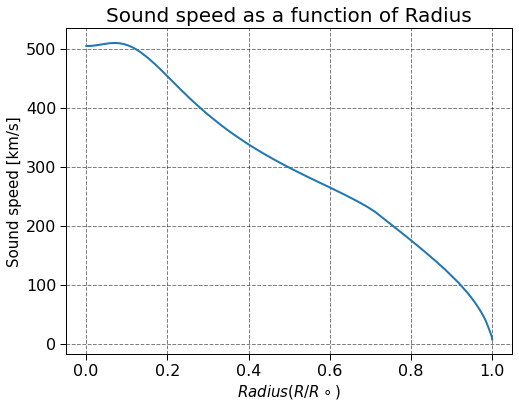

In [467]:
plt.plot(df.Radius,c_s)
plt.xlabel('$Radius (R/R\circ)$',size=15)
plt.ylabel('Sound speed [km/s]',size=15)
plt.title('Sound speed as a function of Radius', size=20)

plt.savefig("Sound speed as a func of Radius.jpg",dpi=500)
plt.show()



In [112]:
#required speed of sound from base of convection zone to top of core
c_s =np.array(np.sqrt((1.66*df.Pres)/df.Rho))*10**-5


array([504.70202886, 504.70202886, 504.70202886, ...,  12.77937326,
        11.28873134,   7.96785131])

In [91]:
# outer limit of the core to the lower limit of convection zone is from 0.25 to 0.7
req_rad= np.linspace(0.25,0.7,2000)
req_rad

array([0.25      , 0.25022511, 0.25045023, ..., 0.69954977, 0.69977489,
       0.7       ])

In [87]:
#time required
time= ((0.45*696340)/c_s)/3600 #hrs
time

array([ 0.17246315,  0.17246315,  0.17246315, ...,  6.81117127,
        7.71056528, 10.92421239])

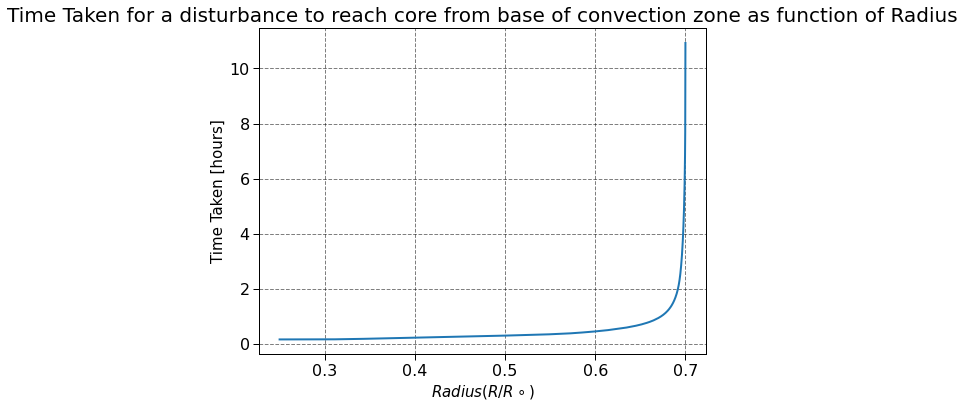

In [472]:
plt.plot(req_rad,time)
plt.xlabel('$Radius (R/R\circ)$',size=15)
plt.ylabel('Time Taken [hours]',size=15)
plt.title('Time Taken for a disturbance to reach core from base of convection zone as function of Radius', size=20)

plt.savefig("Time Taken for disturbance as a func of radius.jpg",dpi=500, bbox_inches='tight')
plt.show()


### Fitting the curve 

In [143]:
from scipy.optimize import curve_fit

In [444]:
from scipy.optimize import curve_fit

def func(x, p, rho):
    return p*x**0.80 + rho


x_data= df.Radius
y_data= c_s

In [453]:
popt,pcov= curve_fit(func,x_data,y_data,p0=(0.98,0.90))

In [454]:
p,rho=popt

In [455]:
rdata=np.linspace(0.25,0.7,1000)
ydata=func(rdata,p,rho)

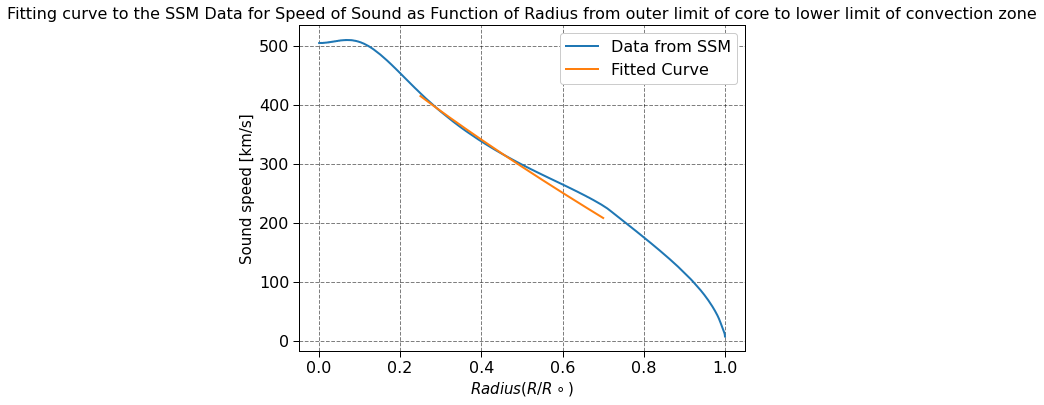

In [470]:
#data
plt.plot(df.Radius,c_s, label='Data from SSM')
#fit
plt.plot(rdata,ydata, label='Fitted Curve')

plt.title('Fitting curve to the SSM Data for Speed of Sound as Function of Radius from outer limit of core to lower limit of convection zone')

plt.xlabel('$Radius (R/R\circ)$',size=15)
plt.ylabel('Sound speed [km/s]',size=15)
plt.legend()

plt.savefig("Fitting curve to SSM data.jpg",dpi=500,bbox_inches='tight')
plt.show()
